##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

# Wstępny wykres danych 

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000 



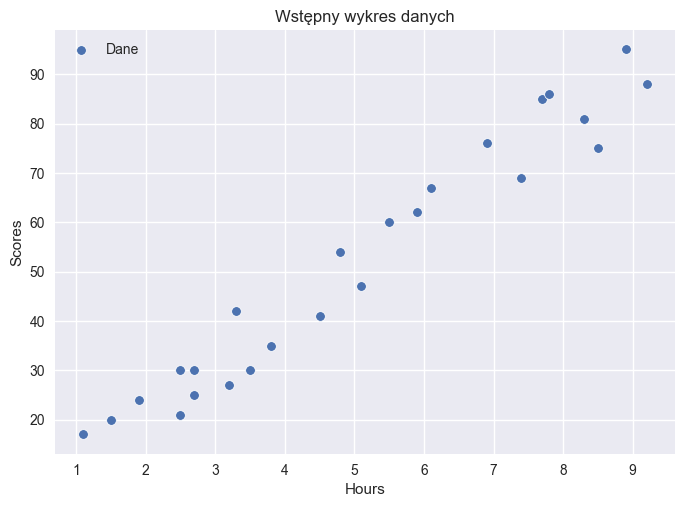

In [3]:
from IPython import display 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

plt.style.use('seaborn-v0_8')

df= pd.read_csv('SCORES.csv')
print(df.head(10))
print(df.describe(), '\n')
df.shape

sns.scatterplot(x='Hours',y='Scores', data = df)
plt.title('Wstępny wykres danych')
plt.legend(['Dane'])
plt.show()

# Podział danych na zbiory danych niezależnych i zależnych, wyliczenie wskaźników

In [4]:
X_train,X_test,y_train, y_test = train_test_split(df[['Hours']], df[['Scores']], test_size=0.3, random_state=42)
regression = LinearRegression()
regression.fit(X_train, y_train)

coef = regression.coef_
intercept = regression.intercept_
y_pred = regression.predict(X_test)
print(f'Wyliczone wskaźniki \n coef: {coef}, intercept: {intercept}')

Wyliczone wskaźniki 
 coef: [[9.23764889]], intercept: [6.12230363]


# Wykres konfrontujący dane

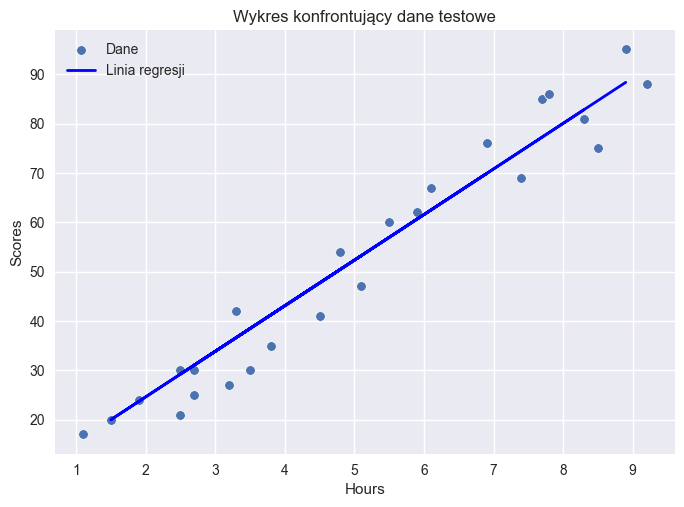

In [5]:
sns.scatterplot(x='Hours',y='Scores', data = df)

plt.plot(X_test, y_pred, color='blue', linewidth = 2)
plt.title('Wykres konfrontujący dane testowe')
plt.legend(['Dane','Linia regresji'])
plt.show()

In [6]:
mean_abs = mean_absolute_error(y_test, y_pred)
mean_sqr = mean_squared_error(y_test, y_pred)
root = np.sqrt(mean_sqr)

print(f'Średni błąd bezwzględny: {mean_abs}')
print(f'Błąd średniokwadratowy: {mean_sqr}')
print(f'Pierwiastek z błędu średniokwadratowego: {root}')

Średni błąd bezwzględny: 4.944901339093145
Błąd średniokwadratowy: 32.227288723471894
Pierwiastek z błędu średniokwadratowego: 5.676908377230681


# Regresja dla danych SBP.csv

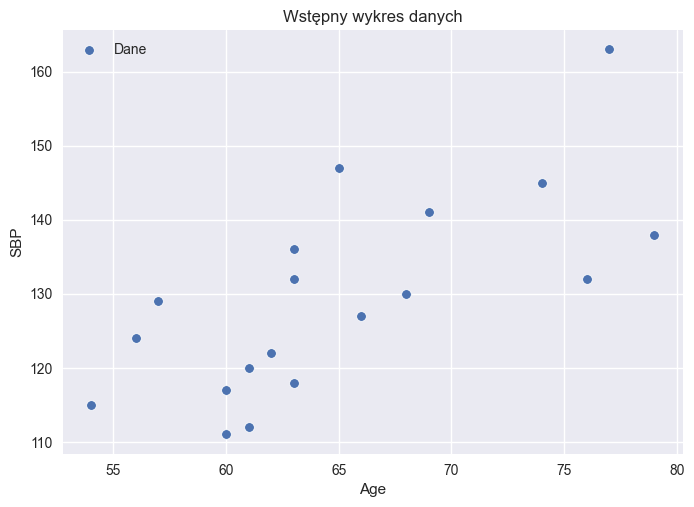

In [7]:
df= pd.read_csv('SBP.csv')

sns.scatterplot(x='Age',y='SBP', data = df)
plt.title('Wstępny wykres danych')
plt.legend(['Dane'])
plt.show()

In [8]:
X_train,X_test,y_train, y_test = train_test_split(df[['Age']], df[['SBP']], test_size=0.3, random_state=42)
regression = LinearRegression()
regression.fit(X_train, y_train)

coef = regression.coef_
intercept = regression.intercept_
y_pred = regression.predict(X_test)
print(f'Wyliczone wskaźniki \n coef: {coef}, intercept: {intercept}')

Wyliczone wskaźniki 
 coef: [[2.14228571]], intercept: [-7.89942857]


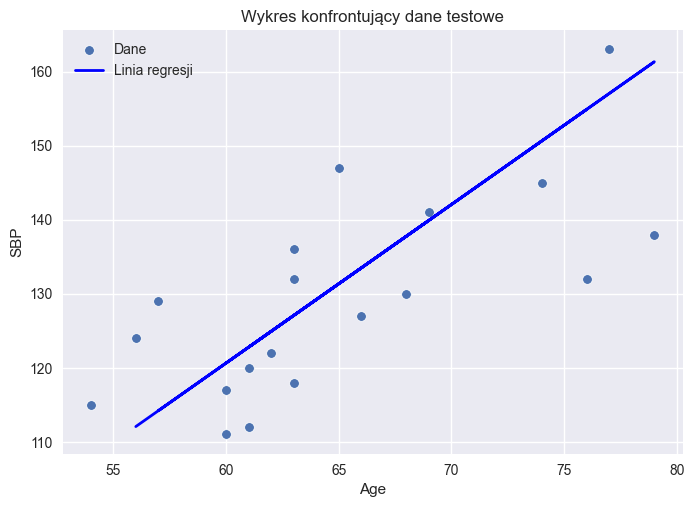

In [9]:
sns.scatterplot(x='Age',y='SBP', data = df)

plt.plot(X_test, y_pred, color='blue', linewidth = 2)
plt.title('Wykres konfrontujący dane testowe')
plt.legend(['Dane','Linia regresji'])
plt.show()

In [10]:
mean_abs = mean_absolute_error(y_test, y_pred)
mean_sqr = mean_squared_error(y_test, y_pred)
root = np.sqrt(mean_sqr)

print(f'Średni błąd bezwzględny: {mean_abs}')
print(f'Błąd średniokwadratowy: {mean_sqr}')
print(f'Pierwiastek z błędu średniokwadratowego: {root}')

Średni błąd bezwzględny: 10.796685714285717
Błąd średniokwadratowy: 170.9599104653061
Pierwiastek z błędu średniokwadratowego: 13.075163879099417


### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

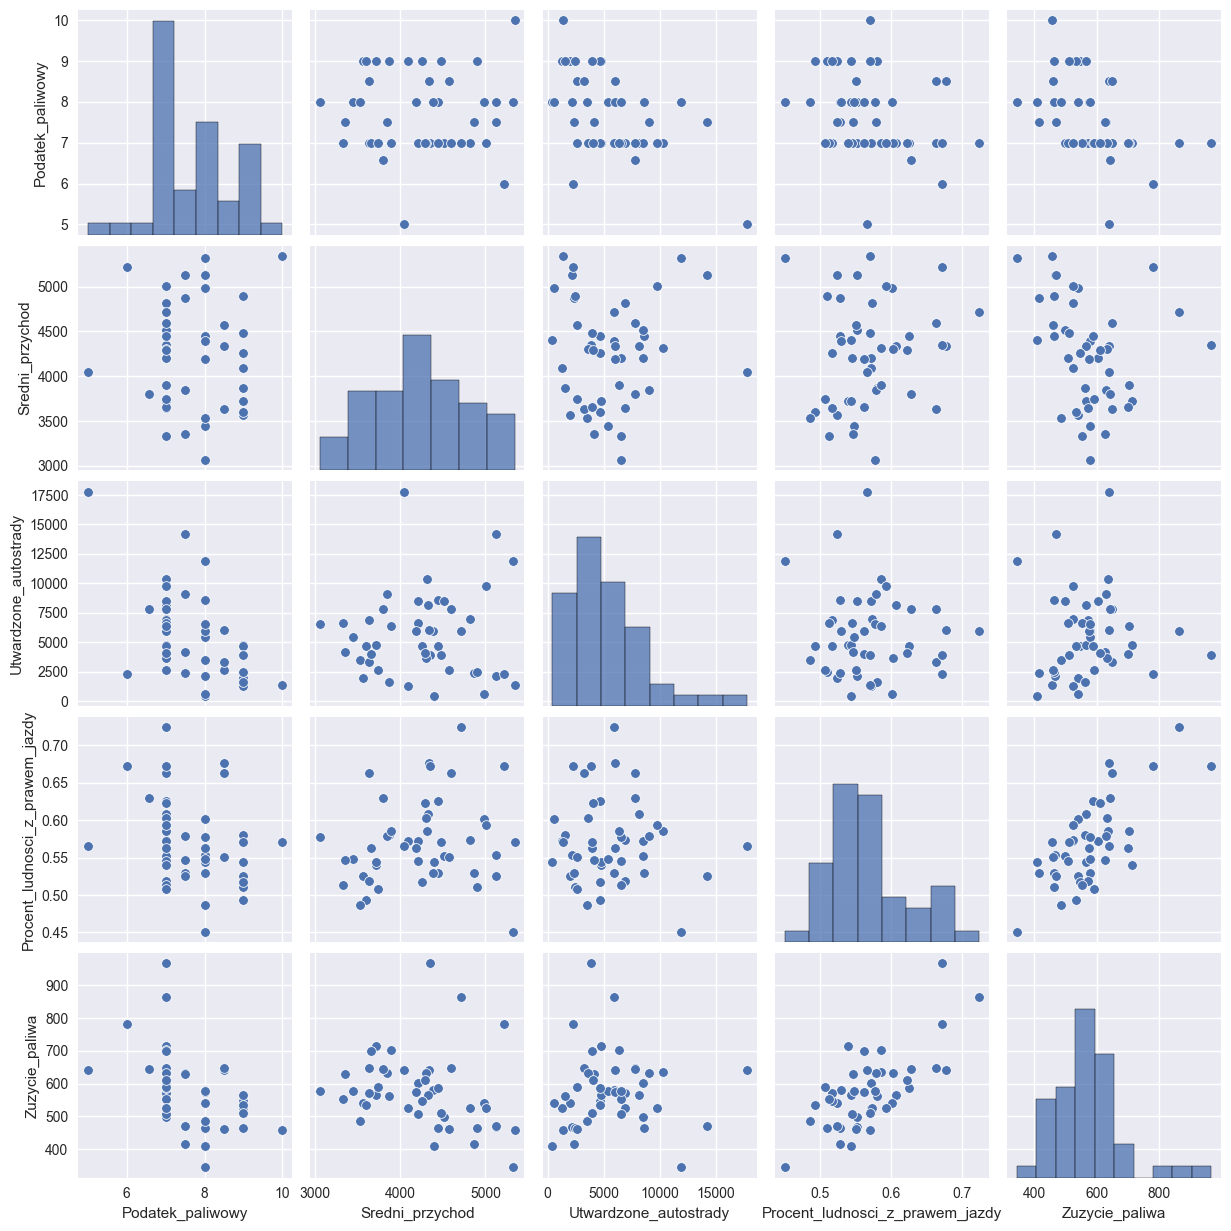

In [11]:
df= pd.read_csv('PETROL.csv')
df.head(10)
y = df[['Zuzycie_paliwa']]
x = df[['Podatek_paliwowy','Sredni_przychod','Utwardzone_autostrady','Procent_ludnosci_z_prawem_jazdy']]
sns.pairplot(df)

In [12]:
X_train,X_test,y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
regression = LinearRegression()
regression.fit(X_train, y_train)

coef = regression.coef_
intercept = regression.intercept_
y_pred = regression.predict(X_test)
print(f'Wyliczone wskaźniki \n coef: {coef}, \n intercept: {intercept}')

Wyliczone wskaźniki 
 coef: [[-3.99336011e+01 -4.53815410e-02 -4.95597538e-03  1.03711642e+03]], 
 intercept: [513.1398382]


In [13]:
mean_abs = mean_absolute_error(y_test, y_pred)
mean_sqr = mean_squared_error(y_test, y_pred)
root = np.sqrt(mean_sqr)

print(f'Średni błąd bezwzględny: {mean_abs}')
print(f'Błąd średniokwadratowy: {mean_sqr}')
print(f'Pierwiastek z błędu średniokwadratowego: {root}')

Średni błąd bezwzględny: 63.02652446557485
Błąd średniokwadratowy: 8076.669020354741
Pierwiastek z błędu średniokwadratowego: 89.8702899759133


Wskaźniki blędów uzyskane dla danego modelu, są zdecydowanie gorsze niż dla poprednich zbiorów danych. Wpływ na te wyniki może mieć prawdopodobnie, zakłócenie relacji występujące między utwardzonymi autostradami a zużytym paliwem, a także w relacjach średniego przychodu i zużytego paliwa. 

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

## Import bibliotek, odczytanie danych, przetworzenie danych

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df= pd.read_csv('HEART.csv')
df = df.replace('?', np.nan)
print(df.head(10))
print(df.describe(), '\n')
print(df.info())
df.shape

   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope   ca  \
0   28    1   2      130  132   0       2     185     0      0.0   NaN  NaN   
1   29    1   2      120  243   0       0     160     0      0.0   NaN  NaN   
2   29    1   2      140  NaN   0       0     170     0      0.0   NaN  NaN   
3   30    0   1      170  237   0       1     170     0      0.0   NaN  NaN   
4   31    0   2      100  219   0       1     150     0      0.0   NaN  NaN   
5   32    0   2      105  198   0       0     165     0      0.0   NaN  NaN   
6   32    1   2      110  225   0       0     184     0      0.0   NaN  NaN   
7   32    1   2      125  254   0       0     155     0      0.0   NaN  NaN   
8   33    1   3      120  298   0       0     185     0      0.0   NaN  NaN   
9   34    0   2      130  161   0       0     190     0      0.0   NaN  NaN   

  thal  num         
0  NaN           0  
1  NaN           0  
2  NaN           0  
3    6           0  
4  NaN           0  
5  N

(294, 14)

## Zakodowanie niezależnych zmiennych kategorialnych

In [29]:
df = df.drop(labels=['ca', 'slope', 'thal'], axis=1).dropna()
df = pd.get_dummies(df, columns=['cp', 'restecg'])
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,0,1,0,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,0,1,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,1,0,0,0,0,1,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,0,1,0
5,32,0,105,198,0,165,0,0.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160,331,0,94,1,2.5,1,0,0,0,1,1,0,0
290,54,0,130,294,0,100,1,0.0,1,0,0,1,0,0,1,0
291,56,1,155,342,1,150,1,3.0,1,0,0,0,1,1,0,0
292,58,0,180,393,0,110,1,1.0,1,0,1,0,0,1,0,0


In [30]:
X = df.drop('num       ', axis=1)
y = df['num       ']

from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# przeskalowanie danych
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.73      0.80      0.76        20

    accuracy                           0.81        53
   macro avg       0.80      0.81      0.80        53
weighted avg       0.82      0.81      0.81        53

